<center><h1>Verbal Autopsy Clustering</h1></center>

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import nltk
from nltk.corpus import stopwords
import contractions
from nltk.stem import WordNetLemmatizer
import re
from nltk.stem import PorterStemmer
import seaborn as sb

<hr>

<h1>Doc Embeding</h1>

<h2>Hold-Out</h2>

In [72]:
data = pd.read_csv("data_output/doc_embeding.csv")
data.drop(data.columns[[0]], axis=1, inplace=True)
data.tail(5)

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
5204,-0.001110,0.000844,-0.000290,-0.000786,-0.000220,0.000232,-0.000976,-0.000244,-0.000446,-0.000632,...,0.000186,-0.001243,-0.000648,0.000066,0.000936,0.000476,0.000691,-0.001007,-0.000754,0.000688
5205,0.000764,0.000095,-0.001039,-0.000258,-0.000189,0.000362,0.000488,-0.000690,-0.000797,-0.000963,...,0.000009,-0.000537,-0.000788,0.000152,0.000378,0.000157,-0.000741,-0.000323,-0.000954,-0.000554
5206,-0.000814,0.000553,0.001077,0.000415,0.001150,-0.000190,-0.000802,-0.000071,0.000561,0.000597,...,-0.000087,0.000255,-0.000928,0.001216,0.000434,-0.000498,-0.001153,-0.000360,0.000454,0.001187
5207,-0.000371,-0.001077,0.000830,-0.000949,0.000250,-0.000678,0.000511,-0.000919,0.000733,-0.001036,...,-0.000753,-0.000851,-0.000789,-0.000663,0.000012,-0.000806,-0.000812,0.000598,0.000069,0.001012
5208,-0.001001,0.000134,0.000700,0.000062,0.000121,-0.000327,-0.000338,0.001197,0.000414,-0.000376,...,0.000566,-0.001026,0.000808,0.001243,-0.000147,-0.001028,-0.000323,0.000957,-0.001135,-0.001223


In [73]:
dataB = pd.read_csv("data_output/preproceso.csv")
dataB.drop("Unnamed: 0", axis=1, inplace=True)
dataB.drop("open_response", axis=1, inplace=True)
dataB.drop("gs_text34", axis=1, inplace=True)
dataB.tail(5)


,module,age,sex,site
5204,0,42.0,1,5
5205,0,14.0,2,4
5206,0,80.0,2,5
5207,0,70.0,1,5
5208,0,30.0,1,2


In [74]:
dataF = pd.concat([dataB, data], axis=1,)
dataF.tail(5)

,module,age,sex,site,0,1,2,3,4,5,...,390,391,392,393,394,395,396,397,398,399
5204,0,42.0,1,5,-0.001110,0.000844,-0.000290,-0.000786,-0.000220,0.000232,...,0.000186,-0.001243,-0.000648,0.000066,0.000936,0.000476,0.000691,-0.001007,-0.000754,0.000688
5205,0,14.0,2,4,0.000764,0.000095,-0.001039,-0.000258,-0.000189,0.000362,...,0.000009,-0.000537,-0.000788,0.000152,0.000378,0.000157,-0.000741,-0.000323,-0.000954,-0.000554
5206,0,80.0,2,5,-0.000814,0.000553,0.001077,0.000415,0.001150,-0.000190,...,-0.000087,0.000255,-0.000928,0.001216,0.000434,-0.000498,-0.001153,-0.000360,0.000454,0.001187
5207,0,70.0,1,5,-0.000371,-0.001077,0.000830,-0.000949,0.000250,-0.000678,...,-0.000753,-0.000851,-0.000789,-0.000663,0.000012,-0.000806,-0.000812,0.000598,0.000069,0.001012
5208,0,30.0,1,2,-0.001001,0.000134,0.000700,0.000062,0.000121,-0.000327,...,0.000566,-0.001026,0.000808,0.001243,-0.000147,-0.001028,-0.000323,0.000957,-0.001135,-0.001223


In [75]:
values = pd.read_csv("data_output/preproceso.csv")
values = values.get(['gs_text34'],1)
values.tail(5)

,gs_text34
5204,"Endocrine, Nutritional and Metabolic Diseases"
5205,Other Infectious Diseases
5206,Diseases of Respiratory System
5207,Other Cardiovascular Diseases
5208,External Causes of Morbidity and Mortality


In [76]:
from sklearn.model_selection import train_test_split

#
# Create Training and Test Split
#
x_train_de, x_test_de, y_train_de, y_test_de = train_test_split(dataF, values, random_state=42, test_size=0.2)

In [77]:
x_train_de

,module,age,sex,site,0,1,2,3,4,5,...,390,391,392,393,394,395,396,397,398,399
45,0,48.0,2,0,0.000728,0.014086,0.010252,-0.009355,-0.012226,0.007611,...,0.003096,0.012542,0.048512,-0.008050,0.005993,-0.011327,-0.020982,0.013188,0.000016,0.006881
3467,1,0.0,2,1,0.000925,-0.000783,-0.001197,0.000988,-0.001197,-0.001236,...,0.001118,-0.001082,-0.000126,0.000121,0.000771,0.000449,0.000476,-0.000442,-0.000801,-0.000716
2484,0,50.0,1,5,-0.000699,-0.000171,0.000722,0.000199,-0.000603,0.000250,...,-0.000245,-0.000661,-0.001131,0.000538,0.000922,0.000548,-0.000405,-0.000856,-0.000787,-0.000751
3703,2,0.0,1,1,0.000184,0.001008,-0.000865,0.000614,-0.000054,0.000278,...,-0.001067,0.000250,-0.000848,0.001127,0.000477,0.000708,0.000267,0.000527,-0.000487,-0.000444
3379,0,63.0,1,5,0.000101,-0.000343,0.000063,-0.000162,0.001060,0.001050,...,-0.000991,0.001073,-0.000647,0.001038,-0.000602,-0.000709,-0.001093,0.000734,-0.000809,-0.001202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,0,75.0,1,1,0.000030,0.001077,0.000793,-0.000549,0.000463,0.000726,...,0.000163,0.000675,0.000196,0.000186,0.000394,0.001124,0.000214,0.001176,0.000589,-0.000024
3092,2,0.0,1,5,-0.000362,-0.000334,0.000754,0.000571,-0.000329,0.000902,...,-0.001028,-0.000937,-0.000792,-0.001001,0.000724,0.000076,-0.000447,-0.000260,-0.000652,-0.000571
3772,0,75.0,2,1,-0.000017,0.012579,0.010216,-0.005600,-0.022829,0.006730,...,0.008036,0.020231,0.029914,-0.017480,0.016650,-0.002369,-0.026730,0.020354,0.003542,0.006730
5191,0,54.0,1,2,0.001177,0.000322,0.000517,-0.000223,-0.000194,-0.000407,...,0.000586,-0.000560,-0.000165,-0.000835,-0.000605,0.000075,-0.000029,-0.000439,0.000381,-0.000135


In [78]:
x_test_de

,module,age,sex,site,0,1,2,3,4,5,...,390,391,392,393,394,395,396,397,398,399
468,1,1.0,1,2,-0.000104,0.000187,-0.000426,-0.000471,0.000519,-0.000955,...,0.000912,-0.001220,0.000754,0.000596,0.000076,-0.000233,-0.001197,0.000358,-0.000269,-0.000728
296,0,56.0,1,0,0.000670,0.000277,-0.000023,-0.000613,0.000723,0.000712,...,0.000617,-0.000790,-0.000042,0.000658,0.000025,-0.000040,0.000406,-0.000581,-0.000782,-0.000154
2509,0,25.0,2,0,-0.001957,0.014347,-0.021950,-0.035592,-0.018689,0.069439,...,-0.011088,0.033071,0.049834,-0.056651,-0.008371,-0.048930,0.012063,0.023363,0.076679,0.002801
4272,1,2.0,2,1,-0.000883,0.000179,-0.000096,-0.000177,0.001247,-0.000754,...,-0.000282,-0.001031,-0.000659,0.001015,-0.000715,0.000436,-0.000046,-0.000870,-0.001104,0.000088
4005,0,28.0,1,3,0.002858,0.009909,0.009570,-0.007660,-0.012327,0.003253,...,0.000398,0.012465,0.044423,-0.009725,0.006989,-0.008458,-0.016793,0.009937,-0.000155,0.004620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1888,0,70.0,2,5,0.000239,-0.001228,-0.000016,-0.000978,0.000309,-0.000206,...,-0.001246,0.000494,-0.000548,-0.000220,-0.000390,0.001205,0.001009,0.000781,0.000386,0.000146
175,2,0.0,2,0,0.003340,0.012921,0.014420,-0.007316,-0.021354,0.005411,...,0.006997,0.016772,0.032078,-0.016045,0.017609,-0.000077,-0.025802,0.016644,0.002228,0.004435
1181,0,75.0,1,5,-0.000642,0.000062,-0.000507,0.000470,0.000404,-0.000172,...,-0.000835,-0.000885,0.000561,-0.000208,-0.000989,-0.000443,0.000194,-0.000885,0.000441,0.000659
927,0,73.0,2,1,-0.010071,0.007062,-0.021579,-0.020968,-0.009549,0.076004,...,-0.009278,0.047123,0.070448,-0.053206,0.001261,-0.052099,-0.021269,0.019569,0.064510,0.001996


In [79]:
from sklearn.preprocessing import StandardScaler

# scalling the input data
sc_X = StandardScaler() 
x_train = sc_X.fit_transform(x_train_de)
x_train = sc_X.fit_transform(x_test_de)

<hr>

<h2>Baseline</h2>

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score

In [67]:
print("We have {} unique classes".format(len(values["gs_text34"].unique())))
print("We have {} training samples".format(len(x_train_de)))
print("We have {} test samples".format(len(x_test_de)))

We have 18 unique classes
We have 1042 training samples
We have 1042 test samples


In [68]:
x_test_de.head(5)

,module,age,sex,site,0,1,2,3,4,5,...,390,391,392,393,394,395,396,397,398,399
468,1,1.0,1,2,-0.000104,0.000187,-0.000426,-0.000471,0.000519,-0.000955,...,0.000912,-0.001220,0.000754,0.000596,0.000076,-0.000233,-0.001197,0.000358,-0.000269,-0.000728
296,0,56.0,1,0,0.000670,0.000277,-0.000023,-0.000613,0.000723,0.000712,...,0.000617,-0.000790,-0.000042,0.000658,0.000025,-0.000040,0.000406,-0.000581,-0.000782,-0.000154
2509,0,25.0,2,0,-0.001957,0.014347,-0.021950,-0.035592,-0.018689,0.069439,...,-0.011088,0.033071,0.049834,-0.056651,-0.008371,-0.048930,0.012063,0.023363,0.076679,0.002801
4272,1,2.0,2,1,-0.000883,0.000179,-0.000096,-0.000177,0.001247,-0.000754,...,-0.000282,-0.001031,-0.000659,0.001015,-0.000715,0.000436,-0.000046,-0.000870,-0.001104,0.000088
4005,0,28.0,1,3,0.002858,0.009909,0.009570,-0.007660,-0.012327,0.003253,...,0.000398,0.012465,0.044423,-0.009725,0.006989,-0.008458,-0.016793,0.009937,-0.000155,0.004620


https://towardsdatascience.com/text-classification-using-naive-bayes-theory-a-working-example-2ef4b7eb7d5a

In [69]:
y_train_de.tail(5)

,gs_text34
466,Diseases of the circulatory system
3092,"Pregnancy, childbirth and the puerperiu"
3772,"Endocrine, Nutritional and Metabolic Diseases"
5191,Other Infectious Diseases
860,Diseases of the Digestive System


In [80]:
# importing classifier
from sklearn.naive_bayes import BernoulliNB

alpha = [0.0,1.0,2.0]
binarize = [0.0,1.0]
fit_prior = [True, False]
best = 0.0

for a in alpha:
    for b in binarize:
        for fp in fit_prior:
            # initializaing the NB
            classifer = BernoulliNB(alpha=a,binarize=b,fit_prior=fp)

            # training the model
            classifer.fit(x_train_de, y_train_de)

            # testing the model
            y_pred_de = classifer.predict(x_test_de)

            print(accuracy_score(y_pred_de, y_test_de))

            if accuracy_score(y_pred_de, y_test_de) > best:
                best = accuracy_score(y_pred_de, y_test_de)
                bestC = classifer
                bestPred = y_pred_de

/home/peio/anaconda3/envs/md/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/peio/anaconda3/envs/md/lib/python3.10/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


0.21305182341650672


/home/peio/anaconda3/envs/md/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/peio/anaconda3/envs/md/lib/python3.10/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


0.1967370441458733


/home/peio/anaconda3/envs/md/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/peio/anaconda3/envs/md/lib/python3.10/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


0.2763915547024952


/home/peio/anaconda3/envs/md/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/peio/anaconda3/envs/md/lib/python3.10/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


0.10076775431861804


/home/peio/anaconda3/envs/md/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.21017274472168906


/home/peio/anaconda3/envs/md/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.190978886756238


/home/peio/anaconda3/envs/md/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.2581573896353167


/home/peio/anaconda3/envs/md/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.2696737044145873


/home/peio/anaconda3/envs/md/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.2092130518234165


/home/peio/anaconda3/envs/md/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.18426103646833014


/home/peio/anaconda3/envs/md/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.24472168905950095


/home/peio/anaconda3/envs/md/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.2581573896353167


In [53]:
# importing accuracy score
from sklearn.metrics import accuracy_score

# printing the accuracy of the model
print(accuracy_score(bestPred, y_test_de))

0.2763915547024952


<AxesSubplot: >

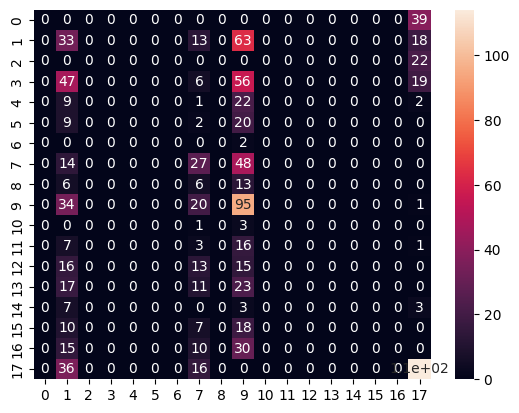

In [54]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# passing actual and predicted values
cm = confusion_matrix(y_test_de, y_pred_de)

# true write data values in each cell of the matrix
sns.heatmap(cm, annot=True)

In [55]:
# importing classification report
from sklearn.metrics import classification_report

# printing the report
print(classification_report(y_test_de, y_pred_de))

                                               precision    recall  f1-score   support

                               Birth asphyxia       0.00      0.00      0.00        39
    Certain infectious and Parasitic Diseases       0.13      0.26      0.17       127
                      Congenital malformation       0.00      0.00      0.00        22
               Diseases of Respiratory System       0.00      0.00      0.00       128
             Diseases of the Digestive System       0.00      0.00      0.00        34
         Diseases of the Genitourinary System       0.00      0.00      0.00        31
               Diseases of the Nervous System       0.00      0.00      0.00         2
           Diseases of the circulatory system       0.20      0.30      0.24        89
Endocrine, Nutritional and Metabolic Diseases       0.00      0.00      0.00        25
   External Causes of Morbidity and Mortality       0.22      0.63      0.33       150
                            Hemorrhagic fe

/home/peio/anaconda3/envs/md/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/peio/anaconda3/envs/md/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/peio/anaconda3/envs/md/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<hr>

<h2>Neural Network</h2>

In [20]:
y_test_de

,gs_text34
468,Diseases of Respiratory System
296,Other Non-communicable Diseases
2509,Certain infectious and Parasitic Diseases
4272,Certain infectious and Parasitic Diseases
4005,External Causes of Morbidity and Mortality
...,...
1888,Diseases of the circulatory system
175,Birth asphyxia
1181,"Endocrine, Nutritional and Metabolic Diseases"
927,Diseases of the circulatory system


In [21]:
import numpy as np
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
layers = [(10,),(50,),(100,),(200,),(500,),(1000,),(2000,),(4000,)]

best = []
bestScore = 0

i = 1

resultados = {}


for hls in layers:

        print(i)
        print(hls)
        
        classifer = MLPClassifier(hidden_layer_sizes=hls, max_iter=5)
        classifer.fit(x_train_de,y_train_de)

        predictions = classifer.predict(x_test_de)
        score = metrics.accuracy_score(y_test_de, predictions)
        print("Mean accuracy of predictions:" + str(score))

        resultados[hls[0]] = score 
        
        i += 1

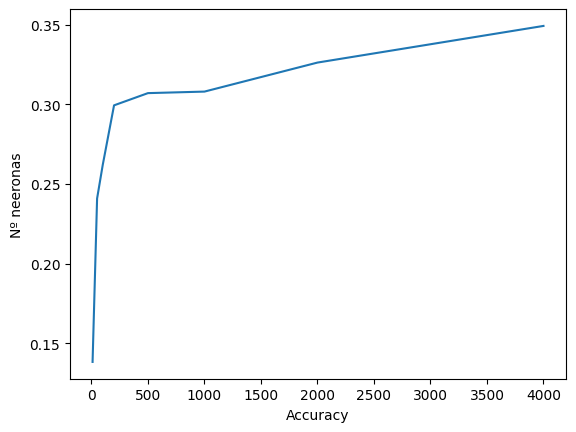

In [23]:
import matplotlib.pyplot as plt

plt.plot([*resultados],list(resultados.values()))
plt.xlabel('Accuracy')
plt.ylabel('Nº neeronas')
plt.show()

In [24]:
layers = [(1000,),(1000,1000),(1000,1000,1000)]

best = []
bestScore = 0

i = 1

resultados = {}


for hls in layers:

        print(i)
        print(hls)
        
        classifer = MLPClassifier(hidden_layer_sizes=hls, max_iter=5)
        classifer.fit(x_train_de,y_train_de)

        predictions = classifer.predict(x_test_de)
        score = metrics.accuracy_score(y_test_de, predictions)
        print("Mean accuracy of predictions:" + str(score))

        resultados[i] = score 
        
        i += 1

1
(1000,)


/home/peio/anaconda3/envs/md/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/peio/anaconda3/envs/md/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(


Mean accuracy of predictions:0.29942418426103645
2
(1000, 1000)


/home/peio/anaconda3/envs/md/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/peio/anaconda3/envs/md/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(


Mean accuracy of predictions:0.32821497120921306
3
(1000, 1000, 1000)


/home/peio/anaconda3/envs/md/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/peio/anaconda3/envs/md/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(


Mean accuracy of predictions:0.34069097888675626


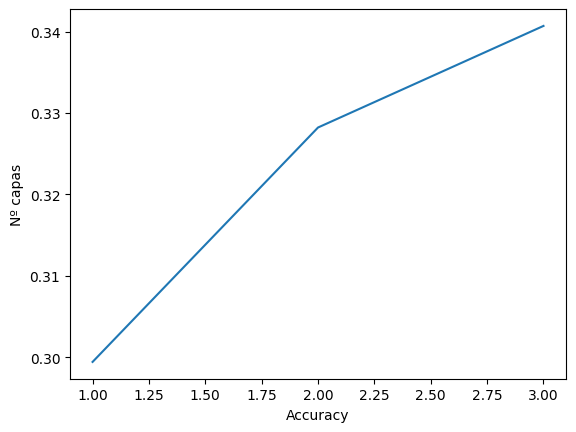

In [25]:
import matplotlib.pyplot as plt

plt.plot([*resultados],list(resultados.values()))
plt.xlabel('Accuracy')
plt.ylabel('Nº capas')
plt.show()

In [26]:
n_iters = [5,25,50,75]

best = []
bestScore = 0

i = 1

resultados = {}


for n in n_iters:

        print(i)
        
        classifer = MLPClassifier(hidden_layer_sizes=(200,200,200), max_iter=n)
        classifer.fit(x_train_de,y_train_de)

        predictions = classifer.predict(x_test_de)
        score = metrics.accuracy_score(y_test_de, predictions)
        print("Mean accuracy of predictions:" + str(score))

        resultados[n] = score 
        
        i += 1

1


/home/peio/anaconda3/envs/md/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/peio/anaconda3/envs/md/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/peio/anaconda3/envs/md/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean accuracy of predictions:0.345489443378119
2


/home/peio/anaconda3/envs/md/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/peio/anaconda3/envs/md/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean accuracy of predictions:0.3550863723608445
3


/home/peio/anaconda3/envs/md/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Mean accuracy of predictions:0.3637236084452975
4


/home/peio/anaconda3/envs/md/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean accuracy of predictions:0.373320537428023


/home/peio/anaconda3/envs/md/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (75) reached and the optimization hasn't converged yet.
  warnings.warn(


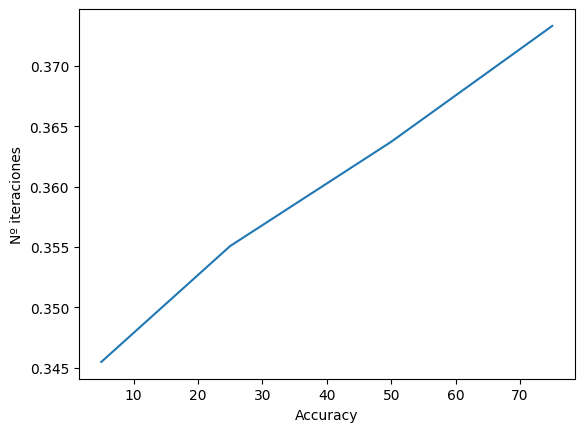

In [28]:
plt.plot([*resultados],list(resultados.values()))
plt.xlabel('Accuracy')
plt.ylabel('Nº iteraciones')
plt.show()

In [ ]:
#He escogido estos layers porque con numeros muy grandes era imposible por tema de tiempo
layers = [(100,100),(100,),(200,100,100,100,100),(200,100,100)]
activation = ['relu','logistic']
solver = ['adam','lbfgs', 'sgd']
alpha = [0.0001, 0.001, 0.01]
learning_rate = ['constant','adaptive','invscaling']
learning_init = [0.001,0.01,0.1]

best = []
bestScore = 0

i = 1

for lri in learning_init:
    for a in activation:
        for s in solver:
            for alp in alpha:
                for lr in learning_rate:
                    for hls in layers:

                        print(i)
                        print([hls, a, s, alp, lr, lri])
                        
                        #He escogido max iter 5 porque quiere dar una pasada rapida de como se desenvuelve cada uno.
                        classifer = MLPClassifier(hidden_layer_sizes=hls, max_iter=5, activation=a, solver=s, random_state=762, alpha=alp, learning_rate=lr, learning_rate_init=lri)
                        classifer.fit(x_train_de,y_train_de)

                        predictions = classifer.predict(x_test_de)
                        score = metrics.accuracy_score(y_test_de, predictions)
                        print("Mean accuracy of predictions: " + str(score))

                        if score > bestScore:
                            best = [hls, a, s, alp, lr, lri]
                            bestScore = score
                        
                        i += 1


In [ ]:
print('Best score: ' + str(bestScore))

In [ ]:
#Utilizando datos obtenidos con las graficas anteriores y a base de prueba y error he determinado que es siguiente clasificador es el mejor
classifer = MLPClassifier(hidden_layer_sizes=(400,400,200,100),verbose=10, max_iter=50)
classifer.fit(x_train_de,y_train_de)

predictions = classifer.predict(x_test_de)
score = metrics.accuracy_score(y_test_de, predictions)
print("Mean accuracy of predictions: " + str(score))

In [90]:
print("Mean accuracy of predictions: " + str(score))

Mean accuracy of predictions: 0.3742802303262956


In [91]:
from sklearn.metrics import classification_report

# printing the report
print(classification_report(y_test_de, predictions))

                                               precision    recall  f1-score   support

                               Birth asphyxia       0.30      0.15      0.20        39
    Certain infectious and Parasitic Diseases       0.34      0.31      0.33       127
                      Congenital malformation       0.00      0.00      0.00        22
               Diseases of Respiratory System       0.35      0.37      0.36       128
             Diseases of the Digestive System       0.17      0.03      0.05        34
         Diseases of the Genitourinary System       0.00      0.00      0.00        31
               Diseases of the Nervous System       0.00      0.00      0.00         2
           Diseases of the circulatory system       0.28      0.63      0.39        89
Endocrine, Nutritional and Metabolic Diseases       0.00      0.00      0.00        25
   External Causes of Morbidity and Mortality       0.42      0.53      0.46       150
                            Hemorrhagic fe

/home/peio/anaconda3/envs/md/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/peio/anaconda3/envs/md/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/peio/anaconda3/envs/md/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot: >

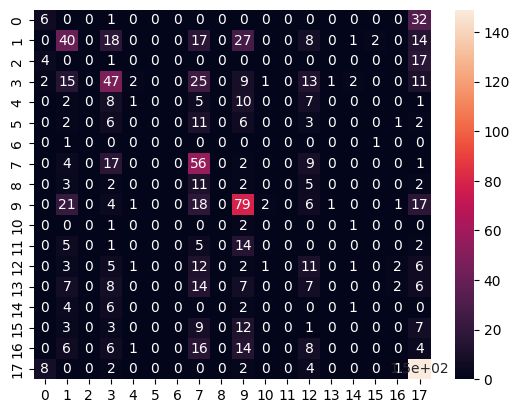

In [92]:
# passing actual and predicted values
cm = confusion_matrix(y_test_de, predictions)

# true write data values in each cell of the matrix
sns.heatmap(cm, annot=True)